## Aula 2 - Processamento de Linguagem Natural
**Notebook referente as aulas do dia 26/08, 29/08**

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Revisão de Processamento de Textos
- 2) Exercícios Aula Anterior
- 3) Transformações dos Textos e Modelagem
- 4) Exercícios

<img src="https://i1.wp.com/thedatascientist.com/wp-content/uploads/2018/09/data_science_wordcloud.png?fit=1584%2C1008&ssl=1" width=800>

## Corpus

É importante ressaltar que a escolha das etapas de pré-processamento não é algo óbvio, dado que há muitas escolhas possíveis acerca do que se fazer para pré-processar os dados. Assim, o indicado é treinar diferentes modelos testando diferentes combinações das técnicas de pré-processamento, até que o melhor procedimento seja encontrado!

**Nomenclatura**: o conjunto de mensagens pré-processadas é chamado de **Corpus**.

## Vocabulário

O vocabulário do corpus nada mais é do que uma listagem das palavras individuais que aparecem no corpus. Para encontrar o vocabulário, basta contarmos a aparição de cada palavra isolada no corpus. Ao fim, teremos N palavras únicas que compõem nosso vocabulário.

## Bag of Words

**Bag of Words** é o processo onde traduzimos o texto já tratado para uma representação numérica que faça sentido para o modelo de *Machine Learning* consiga interpretá-lo.

As transformações mais comuns em NLP são **CountVectorizer** e **TF-IDF**

## CountVectorizer 

Após estudarmos o vocabulário, vamos efetivamente montar o modelo de bag-of-words. Este modelo funciona da seguinte forma:

- Pegue uma frase do corpus;
- Crie um vetor N-dimensional de inteiros (onde N é o número de palavras do vocabulário);
- Cada componente do vetor corresponde a uma palavra do vocabulário, segundo a ordem que as palavras aparecem no vocabulário.
- Preencha esse vetor com zeros (todas suas componentes serão 0);
- Para cada palavra da frase, mude a componente correspondente do vetor para 1;
- Faça isso para todas as frases do corpus;

Ao fim do processo acima para todas as frases do corpus (supomos que sejam M frases), nós empilhamos os respectivos vetores, de modo que teremos uma matriz de M linhas e N colunas. E essa matriz é o modelo final de bag-of-words, que por ser uma matriz numérica, pode ser facilmente usada como input pros modelos de machine learning!

Pra exemplificar o procedimento, vamos a um exemplo: suponha que nossa base de treino contenha as seguintes 3 frases **(M = 3)**:

["Yay can't wait to party together!",<br>
 'You got called a tool?',<br>
 'Still chance there. If you search hard you will get it..let have a try :)']

Após o pre-processamento inicial das frases, o corpus final fica sendo:

['yay cant wait party together',<br>
 'get call tool',<br>
 'still chance search hard get itlet try']

Olhando pro corpus, é fácil ver que nosso vocabulário é:

['wait',
 'itlet',
 'get',
 'still',
 'search',
 'call',
 'yay',
 'cant',
 'together',
 'tool',
 'hard',
 'try',
 'chance',
 'party']

É útil deixarmos o vocabulário em ordem alfabética:

['call',
 'cant',
 'chance',
 'get',
 'hard',
 'itlet',
 'party',
 'search',
 'still',
 'together',
 'tool',
 'try',
 'wait',
 'yay']
 
Temos **N = 14** palavras no vocabulário. 

O one-hot encoding de cada uma das frases do corpus irá, então, produzir um **vetor 14-dimensional** de 1 e 0, com 1 nas posições respectivas às palavras no vocabulário. Vamos entender:

Para a frase "yay cant wait party together", teremos um vetor com o numero 1 nas posições 13, 1, 12, 6, e 9 (respectivamente as posições de "yay", "cant", "wait", "party" e "together"), de forma que temos o vetor:

> "yay cant wait party together"" --> [0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1]

Analogamente, para as outras duas frases, teremos os vetores:

> "get call tool" --> [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]

> "still chance search hard get itlet try" --> [0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0]


Finalmente, o modelo de bag-of-words (BoW) final é a **matriz de dimensão 3 x 14 (M = 3 frases no corpus, N = 14 palavras no vocabulário)**, obtida ao empilhar os vetores:
  
$ BoW = \begin{pmatrix}
0 & 1 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 1 & 0 & 0 & 1 & 1 \\
1 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 1 & 1 & 1 & 1 & 0 & 1 & 1 & 0 & 0 & 1 & 0 & 0
\end{pmatrix} $

Esse é o processo conhecido por [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

Naturalmente, tanto nosso corpus quanto nosso vocabulário serão muito maiores que os desse exemplo simples. Mas, o procedimento é exatamente o mesmo, e no final, teremos exatamente o mesmo output do modelo de bag-of-words: uma matriz M x N de 0 e 1, prontinha pra ser input dos modelos de machine learning!

In [1]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 4.9 MB/s 


In [2]:
# Manipulação de tabelas
import pandas as pd
# Expressões regulares
import re
# Importando o unidecode
from unidecode import unidecode
# Biblioteca de processamento de linguagem natural
import nltk
from nltk.corpus import stopwords 
from nltk.stem.porter import *
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
# Para visualizar or dados
import matplotlib.pyplot as plt
import seaborn as sns
# Tipagem
from typing import List
# Baixando as stopwords
nltk.download('stopwords')
nltk.download('punkt')  # https://www.nltk.org/_modules/nltk/tokenize/punkt.html
nltk.download('rslp')  # Stemmer em português

# https://www.nltk.org/howto/wordnet.html
nltk.download('wordnet')

# NLTK 3.6.6 release: December 2021:
# support OMW 1.4, use Multilingual Wordnet Data from OMW with newer Wordnet versions
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [3]:
class PreProcessPhrase:
  def remove_acentuacao(self, phrase: str, debug: bool = False) -> str:
    # Utilizando a biblioteca unidecode para remover a acentuação do texto
    phrase_fmt = unidecode(phrase)
    # Se o debug estiver ativo
    if debug:
      # Imprimir a frase original e a frase formatada
      print('`remove_acentuacao`: Frase original:', phrase)
      print('`remove_acentuacao`: Frase formatada:', phrase_fmt)

    # Retornando a frase formatada
    return phrase_fmt

  def remove_digits(self, phrase: str, debug: bool = False) -> str:
    # Utilizando expressões regulares para a removação de digitos
    phrase_no_digits = re.sub(r'\d', "", phrase)
    
    # Se o debug for True, imprima a frase original e a transformada
    if debug:
      print('`remove_digits`: Texto original:', phrase)
      print('`remove_digits`: Texto sem digitos:', phrase_no_digits)

    # Retornando a frase sem digitos
    return phrase_no_digits

  def remove_special_char(self, phrase: str, debug: bool = False) -> str:
    # Utilizando expressões regulares para remoção de caracteres especiais
    phrase_no_special_char = re.sub(r'[^a-zA-Z0-9]+', ' ', phrase)

    # Se quisermos utilizar o debug = True, irá mostrar a frase original e transformada
    if debug:
      print('`remove_special_char`: Texto original:', phrase)
      print('`remove_special_char`: Texto sem caracteres especiais:', phrase_no_special_char)

    # Retornando a frase sem caracteres especiais
    return phrase_no_special_char

  def word_lower(self, word: str, debug: bool = False) -> str:
    try:
      # Formatando a palavra em caixa baixa
      word_fmt = word.lower()
      
      # Se o debug for True, iremos imprimir a palavra original e transformada
      if debug:
        print('`word_lower`: Palavra original:', word)
        print('`word_lower`: Palavra transformada:', word_fmt)
    except:
      # Caso a palavra não seja uma string levante um erro (TypeError) informando qual o tipo da palavra passada
      raise TypeError(f'Esperava uma `word` no tipo <str>, foi passado uma {type(word)}')
    return word_fmt

  def remove_stopwords(self, words: List[str], debug: bool = False) -> List[str]:
    # Carregando as stopwords (inglês)
    stopwords_en = list(stopwords.words('english'))

    # Criando uma variável que irá armazenar palavras limpas, que não estejam dentro das stopwords
    clean_words = []

    # Percorrendo cada palavra da nossa lista de palavras:
    for word in words:
      # Verificando se a palavra não está presente nas stopwords
      if word not in stopwords_en:
        # Se a palavra não é uma stopword adicionamos ela a variável clean_words
        clean_words.append(word)
      else:
        # Caso a palavra seja uma stopword e estamos no modo debug (debug=True)
        if debug:
          # Imprimimos qual a palavra da lista words é uma stopword
          print(f'`remove_stopwords`: A palavra "{word}" está presente nas stopwords')
    return clean_words

  def tokenizer(self, phrase: str, debug: bool = False) -> List[str]:
    # Tokenizando a frase (str) utilizando o word_tokenize
    tokens = word_tokenize(phrase)
    # Caso o debug seja True
    # Iremos imprimir a frase original e os seus tokens
    if debug:
      print(f'`tokenizer`: Frase original', phrase)
      print(f'`tokenizer`: tokens', str(tokens))
    # Retornando os tokens
    return tokens

  def stemmer(self, words: List[str], debug: bool = False) -> List[str]:
    # Incializando o Porter Stemmer (inglês)
    stemmer = PorterStemmer()

    # Criando uma lista vazia que irá armazenar as palavras stem
    stem_words = []

    # Percorrendo a lista de palavras (tokens)
    for word in words:
      # Pegando o stem de cada palavra
      s_word = stemmer.stem(word)
      # Adicionando a palavra modificada a lista stem_words
      stem_words.append(s_word)
    # Retornando a lista de palavras stem
    return stem_words

  def lemmatizer(self, words: List[str], debug: bool = False) -> List[str]:
    # Inicializando o Lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Criando uma lista vazia que irá armazenar as palavras lemma
    lemma_words = []

    # Percorrendo a lista de palavras (tokens)
    for word in words:
      # Pegando o stem de cada palavra
      l_word = lemmatizer.lemmatize(word, pos='v')
      # Adicionando a palavra modificada a lista stem_words
      lemma_words.append(l_word)
    # Retornando a lista de palavras stem
    return lemma_words

  def pipeline(self, phrase: str, methods: List[str], debug: bool = False) -> List[str]:
    switcher = {
        'remove_acentuacao': self.remove_acentuacao,
        'remove_digits': self.remove_digits,
        'remove_special_char': self.remove_special_char,
        'word_lower': self.word_lower,
        'remove_stopwords': self.remove_stopwords,
        'tokenizer': self.tokenizer,
        'stemmer': self.stemmer,
        'lemmatizer': self.lemmatizer,
    }
    # Percorrendo o pipeline
    for method in methods:
      # Aplicando cada método definido no methods
      phrase = switcher[method](phrase, debug=debug)
    return phrase


In [4]:
# Abrindo arquivo com dados de revisão de filmes
movies = pd.read_csv('./9.1.movies.csv', index_col=0)

# Pegando 10% da base
movies_sample = movies.sample(frac=0.1, replace=False)

# Aplicando o preprocessamento de dados
# Instância o preprocessador de frases
preprocess = PreProcessPhrase()
# Definindo os passos da nossa pipeline
pipeline = [
    "word_lower",
    "remove_digits",
    "remove_special_char",
    'tokenizer',
    'remove_stopwords',
    'stemmer'
]

# Aplicando a pipeline de preprocessamento para cada documento (linha)
movies_sample['filtered_words'] = movies_sample['text'].apply(preprocess.pipeline, methods=pipeline)

# Normalmente depois do processamento juntamos as palavras novamente em uma só string
movies_sample['join_words'] = movies_sample['filtered_words'].apply(lambda word_list: ' '.join(word_list))

In [5]:
# Verficando o dataframe após o tratamento de dados
# Temos a coluna filtered_words, referente aos tokens processados
# Temos a coluna join_words referente a uma string dos tokens processados juntos por um espaço (join)
movies_sample.head()

,text,label,filtered_words,join_words
8240,This movie is supposed to be taking place in a...,0,"[movi, suppos, take, place, around, seattl, po...",movi suppos take place around seattl porteau c...
13795,For that matter one of the worst FILMS ever ma...,0,"[matter, one, worst, film, ever, made, plot, g...",matter one worst film ever made plot goe follo...
75,Some famous stories are prone to being moved t...,0,"[famou, stori, prone, move, anoth, epoch, beco...",famou stori prone move anoth epoch becom embar...
2229,"There is a bit of a spoiler below, which could...",0,"[bit, spoiler, could, ruin, surpris, one, unex...",bit spoiler could ruin surpris one unexpect tr...
4269,"""Showtime"" falls somewhere north of what some ...",1,"[showtim, fall, somewher, north, critic, say, ...",showtim fall somewher north critic say littl s...


In [6]:
# Definindo as features e targets
X = movies_sample['join_words']
y = movies_sample['label']

In [7]:
# Explorar as features
X

8240     movi suppos take place around seattl porteau c...
13795    matter one worst film ever made plot goe follo...
75       famou stori prone move anoth epoch becom embar...
2229     bit spoiler could ruin surpris one unexpect tr...
4269     showtim fall somewher north critic say littl s...
                               ...                        
12872    tiempo de valient fit snugli buddi action movi...
3247     stori amaz disinterest kill psychic charact pl...
12011    cheezi yep poorli film betcha zero budget prou...
17851    watch seri curios want see could possibl moder...
1728     score crap technic everyth els bad br br anoth...
Name: join_words, Length: 5000, dtype: object

In [8]:
# Explorar os targets
y

8240     0
13795    0
75       0
2229     0
4269     1
        ..
12872    1
3247     0
12011    1
17851    0
1728     0
Name: label, Length: 5000, dtype: int64

In [9]:
# Importando o train_test_split para separar os dados de treino e teste
from sklearn.model_selection import train_test_split

# Separando os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, # as features
    y, # o target
    test_size=0.3, # Separando 30% dos dados para teste
    random_state=42 # Permitindo que o teste seja reprodutivel
)

In [10]:
# Explorando as features de treino
X_train

19264    check peter falk play elderli new yorker summo...
35678    never heard larri fessenden judg effort write ...
2628     first exposur whale music rheostat album name ...
3516     opportun preview film member test audienc thin...
34263    america next top model good show help peopl ca...
                               ...                        
29133    hard write line copi film noir lot say memor e...
24050    watch film awar movi nonetheless like allow be...
28099    movi thought low budget turn awesom rent block...
22598    director ever sit behind camera wellman could ...
9104     peopl learn movi made fun necessarili chang wo...
Name: join_words, Length: 3500, dtype: object

In [11]:
# Explorando as features de teste
X_test

3489     matter time spoof would made sport movi plenti...
13465    seen unend epic time one realli top movi long ...
36863    alway fanci film video cover eventu got round ...
11635    viewer said disappoint seem wildli miss point ...
25209    pleas give one miss br br kristi swanson rest ...
                               ...                        
36429    screenplay worst part film lurch one premis ne...
24295    like money stumbl brilliant film local video s...
2972     sophist nobodi credit great career taken whole...
3332     movi titan make much night rememb write tragic...
2306     boundless raw energi uncompromis vision talk r...
Name: join_words, Length: 1500, dtype: object

In [12]:
# Importando o extrator de features de texto CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [13]:

# Instância o CountVectorizer
cv = CountVectorizer(
    # N-gram range (min e max), indica se queremos contar n-gramas
    # (1,1) significa apenas unigramas
    ngram_range=(1,1),
    # Se esse parâmetro for True, o resultado é binário (0, 1)
    # Se falso, o retorno é a contagem da palavra na frase, sua ocorrência por frase
    binary=False
)

In [14]:
# Extraindo o vocabulário e contando a ocorrência da palavra por frase (parecido com one-hot enconding)
# Criando o vocabulário a partir do corpus de treino.
# Caso uma palavra apareça no conjunto de teste e não no conjunto de treino.
# Essa palavra não será contabilizada, ou seja, não teremos uma coluna referente a essa palavra.
# Utiliza o toarray para transformar a matriz esparsa em uma matriz densa.
X_train_cv = cv.fit_transform(X_train).toarray()
X_test_cv = cv.transform(X_test).toarray()

In [15]:
# Conseguimos o vocabulário no CountVectorizer
# Note que o cv.vocabulary_ retorna a palavra (chave) e o seu index (valor)
cv.vocabulary_

{'check': 3232,
 'peter': 14516,
 'falk': 6631,
 'play': 14758,
 'elderli': 5983,
 'new': 13287,
 'yorker': 21973,
 'summon': 18874,
 'children': 3315,
 'home': 9036,
 'plan': 14730,
 'commit': 3777,
 'suicid': 18849,
 'movi': 12883,
 'progress': 15235,
 'get': 7740,
 'see': 17136,
 'everyon': 6411,
 'flaw': 7014,
 'problem': 15197,
 'peopl': 14423,
 'may': 12101,
 'interpret': 9818,
 'heartwarm': 8707,
 'mostli': 12851,
 'enjoy': 6172,
 'charact': 3161,
 'let': 11147,
 'anyth': 771,
 'even': 6392,
 'engag': 6158,
 'littl': 11314,
 'lewd': 11172,
 'br': 2260,
 'might': 12439,
 'best': 1741,
 'ever': 6396,
 'still': 18562,
 'worth': 21785,
 'long': 11401,
 'thought': 19573,
 'perfect': 14448,
 'look': 11412,
 'sort': 18127,
 'role': 16443,
 'glass': 7857,
 'eye': 6566,
 'also': 498,
 'star': 18443,
 'laura': 10975,
 'san': 16759,
 'giacomo': 7762,
 'david': 4658,
 'paymer': 14331,
 'judg': 10286,
 'reinhold': 15956,
 'shera': 17429,
 'danes': 4586,
 'real': 15765,
 'life': 11207,
 'wife

In [16]:
# Se quisermos uma lista do vocabulario (em ordem)
# utilizamos o `get_feature_names_out`
cv.get_feature_names_out()

array(['aa', 'aaaaah', 'aaaaahhhh', ..., 'zyurang', 'zz', 'zzzzzzzzzzzz'],
      dtype=object)

In [17]:
# Após rodar o CountVectorizer (fit_transform)
# Cada linha do dado transformado é um documento
# Cada coluna do dado é uma palavra do vocabulário
# O número indica a quantidade de vezes que essa palavra aparece no documento
# Pois o binary era False (contagem absoluta)
X_train_cv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [18]:
# Temos dessa forma
# 3500 documentos
# 22246 palavras (vocabulário)
X_train_cv.shape

(3500, 22126)

In [19]:
# A frequência máxima de uma palavra em um documento
# Podemos ver qual foi o valor máximo!
X_train_cv.max()

86

In [20]:
# Armazenando a frequência máxima de uma palavra no documento em uma variável
max_ocorrencia = X_train_cv.max()

In [21]:
import numpy as np
# Descobrindo qual o documento e qual palavra na frase
row, col = np.argwhere(X_train_cv == max_ocorrencia)[0]

In [22]:
# Pegando o documento que aparece essa palavra tão frequente
phrase = X_train.iloc[row]

In [23]:
phrase

'chupacabra accord mockumentari mysteri br br creatur kill eat hispan goat latin br br america mexico year one cross border br br southern texa cute intrepid cryptozoologist br br make word go isol ranch find one uncl br br kill creatur graini video footag br br monster exist take badass black guy gun two br br cameramen easi edit coverag go ahuntin br br chupacabra ten minut film find br br rest film team documentarian get br br attack bloodthirsti monster stilt dialogu one br br point team run coupl hotti witch lead br br chupacabra nest fbi knew br br cheapli tex mex witch could bought inform whole br br decad mythic beast report could clear br br blank check br br end bloodi death charact give br br goat patoot chupacabra captur kill br br autopsi point autopsi scene highlight br br makeup depart effort cheap film br br film shot video like bwp yet cameraman br br charact never reload tape recharg camera br br batteri lead actress aw beauti br br averag bwp use improvis product br 

In [24]:
# Descobrindo qual a palavra que ocorre com maior frequência em um dado documento
list(cv.get_feature_names_out())[col]

'br'

In [25]:
# Inicializando um contador para contar a frequência da palavra descoberta acima
total = 0

# Percorrendo a lista de tokens desse documento
# já que esse documento já sofreu um pre-processamento anterior (nossa pipeline)
# Logo podemos, transformar a frase em tokens utilizando o metodo tokenizer
for word in PreProcessPhrase().tokenizer(phrase, debug=False):
  # Se a palavra (token) for igual a palavra de maior frequência
  # Somamos mais um no total (aumentando a contagem)
  if word == list(cv.get_feature_names_out())[col]:
    # Aumentando a contagem do contador
    total +=1

# Imprimindo qual a palavra que ocorreu com maior frequência
# Assim como a sua contagem (manual)
# Além de imprimir a frase original
print(f'A palavra {list(cv.get_feature_names_out())[col]}, aparece {total} vezes')
print(f'A frase original era: {phrase}')

A palavra br, aparece 86 vezes
A frase original era: chupacabra accord mockumentari mysteri br br creatur kill eat hispan goat latin br br america mexico year one cross border br br southern texa cute intrepid cryptozoologist br br make word go isol ranch find one uncl br br kill creatur graini video footag br br monster exist take badass black guy gun two br br cameramen easi edit coverag go ahuntin br br chupacabra ten minut film find br br rest film team documentarian get br br attack bloodthirsti monster stilt dialogu one br br point team run coupl hotti witch lead br br chupacabra nest fbi knew br br cheapli tex mex witch could bought inform whole br br decad mythic beast report could clear br br blank check br br end bloodi death charact give br br goat patoot chupacabra captur kill br br autopsi point autopsi scene highlight br br makeup depart effort cheap film br br film shot video like bwp yet cameraman br br charact never reload tape recharg camera br br batteri lead actress

In [26]:
# Qual a frequência máxima de uma dada palavra em um documento
X_train_cv.max(axis=1)

array([4, 6, 6, ..., 1, 4, 4])

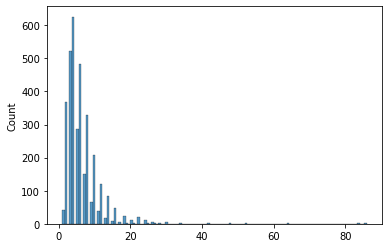

In [27]:
# Plottando o histograma
# Com a frequência máxima por documento
sns.histplot(X_train_cv.max(axis=1))

**Drops**

Tente instânciar o CountVectorizer com o `binary = True`.

1-) Faça a transformação dos dados de treino utilizando o CountVectorizer inicializado com o parâmetro `binary=True`.  
2-) Qual o valor máximo de frequência de qualquer palavra nesses dados transformados? (o valor máximo de uma célula).  
3-) Faça o gráfico de contagem máxima por documento  
4-) Quantas palavras temos no nosso vocabulário?  
5-) Quantos documentos temos (dados de treino)?  
6-) Há diferenças entre usar o CountVectorizer com binary=True vs False, quando analisamos o tamanho do [documentos vs vocabulário]?

Questão 1:
Dados:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
------------------------------------------------------------
Questão 2:
A frequência máxima de uma palavra em qualquer documento é 1
A frequência minima de uma palavra em qualquer documento é 0
------------------------------------------------------------
Questão 3:


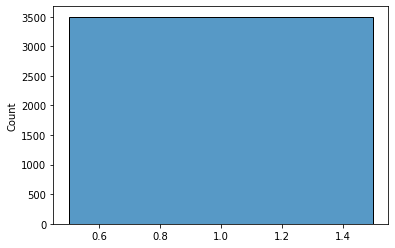

------------------------------------------------------------
Questão 4:
O número de palavras no vocabulário é 22126
------------------------------------------------------------
Questão 5:
O número de documentos é 3500
------------------------------------------------------------
Questão 6:
O input com ambas transformações são iguais? Verdadeiro
------------------------------------------------------------


In [37]:
# 1-) Faça a transformação dos dados de treino
    # utilizando o CountVectorizer inicializado com o parâmetro binary=True.
# Instânciando o CountVectorizer com binary=True
cv_binary_true = CountVectorizer(binary=True)
# Realizando a transformação dos nossos documentos em features
X_train_binary_true = cv_binary_true.fit_transform(X_train).toarray()
print('Questão 1:')
print('Dados:')
print(X_train_binary_true)
print('-'*60)

# 2-) Qual o valor máximo de frequência
    # de qualquer palavra nesses dados transformados? (o valor máximo de uma célula).
print('Questão 2:')
print('A frequência máxima de uma palavra em qualquer documento é', X_train_binary_true.max())
print('A frequência minima de uma palavra em qualquer documento é', X_train_binary_true.min())
print('-'*60)

# 3-) Faça o gráfico de contagem máxima por documento
# Com o `max(axis=1)` pegamos a frequência máxima de uma palavra em cada documento
print('Questão 3:')
sns.histplot(X_train_binary_true.max(axis=1))
plt.show()
print('-'*60)
# 4-) Quantas palavras temos no nosso vocabulário?
print('Questão 4:')
print('O número de palavras no vocabulário é', X_train_binary_true.shape[1])

print('-'*60)
# 5-) Quantos documentos temos (dados de treino)?
print('Questão 5:')
print('O número de documentos é', X_train_binary_true.shape[0])
print('-'*60)
# 6-) Há diferenças entre usar o CountVectorizer com binary=True vs False,
    # quando analisamos o tamanho do (documentos vs vocabulário)?
print('Questão 6:')
is_equal_transformation = 'Verdadeiro' if X_train_cv.shape == X_train_binary_true.shape else 'Falso'
print('O input com ambas transformações são iguais?', is_equal_transformation)

print('-'*60)

Vamos fazer uma função para testar diversos tipos de modelos:

In [40]:
random_seed = 42
# Importando os modelos ensemble (bagging, boosting)
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# Importando o modelo de regressão logística
from sklearn.linear_model import LogisticRegression

# Importando as métricas
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve)


**Drops**

Crie diversas classes de modelos que possuam três métodos, fit, predict e predict_proba.

Quais modelos criar:
- Logistic regression (utilize o solver `lbfgs`)
- Random Forest
- AdaBoost

Nessa classe terá os seguintes atributos:

- model_name - referente ao nome do modelo
- estimator - referente ao estimador (modelo) criado pela classe

O fit aceita dois parâmetros:
- As features (X)
- O target (y)

O predict aceita um parâmetro:
- As features (X)

O predict_proba aceita um parâmetro:
- As features (X)

Essas classes herdam de uma classe base o seguinte método:

`class BaseModel`
- evaluate

No `evaluate` irá o cálculo da:
- Curva ROC
  - Plot da curva ROC
  - ROC - AUC
- Acurácia
- Precisão
- Recall
- F1-Score

O retorno do `evaluate` será um dicionário contendo:
- model: nome do modelo
- accuracy: a acurácia do modelo
- precision: a precisão do modelo
- recall: a revocação do modelo
- f1-score: o f1-score do modelo
- roc-auc: o ROC-AUC do modelo




In [47]:
# Criando a nossa classe base (que contêm métodos que serão herdados pelas classes filhas)
class BaseModel:
  # Adicionando um nome de modelo (acessado por self.model_name)
  model_name = None
  # Adicionando um modelo base
  model = None

  # Definindo um padrão (não necessário mas interessante as vezes)
  def fit(self):
    pass
  # Definindo um padrão (não necessário mas interessante as vezes)
  def predict(self):
    pass
  # Definindo um padrão (não necessário mas interessante as vezes)
  def predict_proba(self):
    pass

  # Criando nossa função de avaliação do modelo
  # Recebe os argumentos
  # X: features
  # y_true: valores targets reais
  def evaluate(self, X, y_true):
    # Fazendo a predição utilizando as features de entrada
    y_predict = self.model.predict(X)
    # Calculando a curva ROC
    fpr, tpr, thresholds = roc_curve(y_true, self.model.predict_proba(X)[:,1])
    # Calculando o ROC-AUC
    auc = roc_auc_score(y_true, y_predict)
    # Calculando a acurácia
    accuracy = accuracy_score(y_true, y_predict)
    # Calculando a precisão
    precision = precision_score(y_true, y_predict, average='weighted')
    # Calculando a revocação
    recall = recall_score(y_true, y_predict)

    # Calculando o F1-score
    f1 = f1_score(y_true, y_predict, average='weighted')
    # Inicializando o plot do gráfico de ROC
    # Adicionando a legenda sendo o nome do modelo e a AUC
    plt.plot(fpr, tpr, label=f'{self.model_name} ROC (AUC={auc:.2f})')
    
    # Imprimindo dados do modelo:
    # Nome do modelo
    print(f"Model      : {self.model_name}")
    # A sua acurácia
    print(f"Accuracy   : {accuracy:.4f}")
    # A sua precisão
    print(f"Precision  : {precision:.4f}")
    # A sua revocação
    print(f"Recall     : {recall:.4f}")
    # O seu F1-score
    print(f"F1 - Score : {f1:.4f}")
    # A sua ROC-AUC
    print(f"ROC - AUC  : {auc:.4f}")
    # Imprimindo um divisor (para facilitar a visualização)
    print("======================")

    # Salvando os dados do modelo em um dicionário
    results = {
        "model": self.model_name,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1-score": f1,
        "roc-auc": auc
    }
    # Retornando o dicionário contendo os seus dados
    return results

# Construindo uma classe de RandomForest que herde o modelo base
class MoviesRandomForest(BaseModel):
  # Função de inicialização
  def __init__(self, random_seed: int = 42, debug: bool = False):
    self.model_name = 'Random Forest'
    self.model = RandomForestClassifier(random_state=random_seed)
    self.debug = debug

  def fit(self, X, y):
    if self.debug:
      print(f'Realizando o fit do modelo {self.model_name}')
    self.model.fit(X, y)

  def predict(self, X):
    if self.debug:
      print(f'Realizando o predict do modelo {self.model_name}')
    ypred = self.model.predict(X)
    return ypred
  def predict_proba(self, X):
    if self.debug:
      print(f'Realizando o predict_proba do modelo {self.model_name}')
    ypred_proba = self.model.predict_proba(X)
    return ypred_proba

class MoviesLogisticRegression(BaseModel):
# Função de inicialização
  def __init__(self, random_seed: int = 42, debug: bool = False):
    self.model_name = 'Logistic Regression'
    self.model = LogisticRegression(random_state=random_seed, solver='lbfgs')
    self.debug = debug

  def fit(self, X, y):
    if self.debug:
      print(f'Realizando o fit do modelo {self.model_name}')
    self.model.fit(X, y)

  def predict(self, X):
    
    if self.debug:
      print(f'Realizando o predict do modelo {self.model_name}')
    ypred = self.model.predict(X)
    return ypred
  def predict_proba(self, X):
    if self.debug:
      print(f'Realizando o predict_proba do modelo {self.model_name}')
    ypred_proba = self.model.predict_proba(X)
    return ypred_proba

class MoviesAdaBoost(BaseModel):
# Função de inicialização
  def __init__(self, random_seed: int = 42, debug: bool = False):
    self.model_name = 'Ada Boost'
    self.model = AdaBoostClassifier(random_state=random_seed)
    self.debug = debug

  def fit(self, X, y):
    if self.debug:
      print(f'Realizando o fit do modelo {self.model_name}')
    self.model.fit(X, y)

  def predict(self, X):
    if self.debug:
      print(f'Realizando o predict do modelo {self.model_name}')
    ypred = self.model.predict(X)
    return ypred

  def predict_proba(self, X):
    if self.debug:
      print(f'Realizando o predict_proba do modelo {self.model_name}')
    ypred_proba = self.model.predict_proba(X)
    return ypred_proba


In [48]:
# Vamos testar um modelo individualmente
# Instanciando o modelo de Random Forest criado acima
rf = MoviesRandomForest(debug=False)
# Realizando o fit dos dados
rf.fit(X_train_cv, y_train)
# Realizando o predict dos dados de teste
rf.predict(X_test_cv)

array([0, 0, 1, ..., 1, 1, 1])

Model      : Random Forest
Accuracy   : 0.8247
Precision  : 0.8248
Recall     : 0.8116
F1 - Score : 0.8246
ROC - AUC  : 0.8245


{'model': 'Random Forest',
 'accuracy': 0.8246666666666667,
 'precision': 0.824796513407507,
 'recall': 0.8115746971736204,
 'f1-score': 0.8246255821560527,
 'roc-auc': 0.824545604861579}

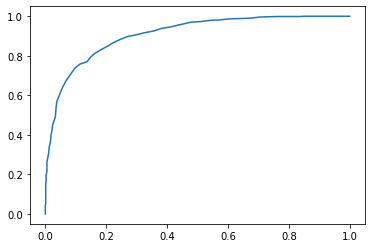

In [49]:
# Que a classe MoviesRandomForest herdou o metodo evaluate
# Não precisamos ficar modificando em vários lugares caso fosse necessário
# adicionar uma métrica nova no evaluate!
rf.evaluate(X_test_cv, y_test)

In [50]:
# Vamos testar um modelo individualmente
# Instanciando o modelo de Random Forest criado acima
# Visualizando o debug
rf = MoviesRandomForest(debug=True)
# Realizando o fit dos dados
rf.fit(X_train_cv, y_train)
# Realizando o predict dos dados de teste
rf.predict(X_test_cv)

Realizando o fit do modelo Random Forest
Realizando o predict do modelo Random Forest


array([0, 0, 1, ..., 1, 1, 1])

Realizando o fit do modelo Random Forest
Model      : Random Forest
Accuracy   : 0.8247
Precision  : 0.8248
Recall     : 0.8116
F1 - Score : 0.8246
ROC - AUC  : 0.8245
Realizando o fit do modelo Logistic Regression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Model      : Logistic Regression
Accuracy   : 0.8300
Precision  : 0.8300
Recall     : 0.8264
F1 - Score : 0.8300
ROC - AUC  : 0.8300


{'model': 'Logistic Regression',
 'accuracy': 0.83,
 'precision': 0.82999893314367,
 'recall': 0.8263795423956931,
 'f1-score': 0.8299961461716637,
 'roc-auc': 0.8299665215280975}

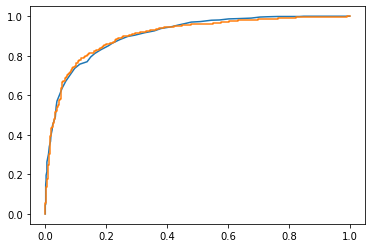

In [51]:
# Vamos testar um modelo individualmente
# Instanciando o modelo de Random Forest criado acima
# Visualizando o debug
rf = MoviesRandomForest(debug=True)
# Realizando o fit dos dados no modelo de Random Forest
rf.fit(X_train_cv, y_train)
# Realizando o evaluate dos dados de teste no modelo de Random Forest
rf.evaluate(X_test_cv, y_test)

# Instanciando o modelo de Regressão Logistica criado acima
lr = MoviesLogisticRegression(debug=True)
# Realizando o fit dos dados no modelo de Regressão Logistica
lr.fit(X_train_cv, y_train)
# Realizando o evaluate dos dados de teste no modelo de Regressão Logistica
lr.evaluate(X_test_cv, y_test)


In [52]:
# Criando uma pipeline para testar diversos modelos em série
def model_test_pipeline(
    models: List[str],
    X_train: np.ndarray,
    X_test: np.ndarray,
    y_train: np.ndarray,
    y_test: np.ndarray,
    debug: bool = False) -> pd.DataFrame:
  # Criando uma lista vazia de resultados
  final_results = []

  model_switcher = {
      'MoviesRandomForest': MoviesRandomForest,
      "MoviesLogisticRegression": MoviesLogisticRegression,
      "MoviesAdaBoost": MoviesAdaBoost
  }
  # Iterando sobre cada modelo da nossa pipeline
  for model in models:
    # Instânciando um modelo especifico da pipeline
    # E para tal utilizamos o switcher definido acima
    selected_model = model_switcher[model](debug=debug)
    # Fazendo o fitting de dados de treino
    selected_model.fit(X_train, y_train)
    # Avaliando a performance do modelo selecionado
    model_results = selected_model.evaluate(X_test, y_test)
    # Adicionando o resultado numa lista de resultados
    final_results.append(model_results)

  # Adicionando o estilo ao plot
  # Criar uma linha base (o modelo deve performar mais do que a base)
  # Essa linha varia de 0-1 no eixo x e y, e apresenta cor vermelha tracejada
  plt.plot([0, 1], [0, 1], 'r--')
  # Definindo os limites do eixo x
  plt.xlim(0, 1)
  # Definindo os limites do eixo y
  plt.ylim(0, 1.05)
  # Definindo o nome do eixo x
  plt.xlabel('False Positive Rate')
  # Definindo o nome do eixo y
  plt.ylabel('True Positive Rate')
  # Adicionando um titulo ao plot
  plt.title('ROC-AUC')
  # Adicionando uma legenda na direita inferior
  plt.legend(loc='lower right')
  # Imprimindo o gráfico na tela
  plt.show()

  # Transformando os resultados em uma tabela
  results_df = pd.DataFrame(final_results)
  # Retornando a tabela de resultados
  return results_df
  

Model      : Random Forest
Accuracy   : 0.8247
Precision  : 0.8248
Recall     : 0.8116
F1 - Score : 0.8246
ROC - AUC  : 0.8245


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Model      : Logistic Regression
Accuracy   : 0.8300
Precision  : 0.8300
Recall     : 0.8264
F1 - Score : 0.8300
ROC - AUC  : 0.8300
Model      : Ada Boost
Accuracy   : 0.7907
Precision  : 0.7927
Recall     : 0.8291
F1 - Score : 0.7904
ROC - AUC  : 0.7910


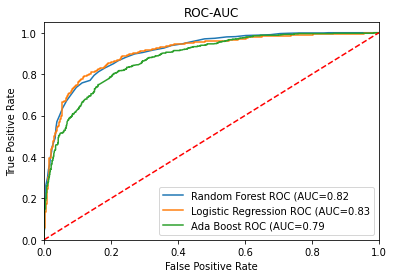

In [53]:
# Definindo os modelos a serem executados pela pipeline
models = ['MoviesRandomForest', 'MoviesLogisticRegression', 'MoviesAdaBoost']

# Rodando a pipeline com os modelos definidos acima
# E salvando os resultados (DataFrame) na variável results_cv
results_cv = model_test_pipeline(
    models=models,
    X_train=X_train_cv,
    X_test=X_test_cv,
    y_train=y_train,
    y_test=y_test,
    debug=False
)

In [58]:
results_cv.sort_values('precision', ascending=False)

,model,accuracy,precision,recall,f1-score,roc-auc
1,Logistic Regression,0.830000,0.829999,0.826380,0.829996,0.829967
0,Random Forest,0.824667,0.824797,0.811575,0.824626,0.824546
2,Ada Boost,0.790667,0.792693,0.829071,0.790410,0.791022


Realizando o fit do modelo Random Forest
Model      : Random Forest
Accuracy   : 0.8247
Precision  : 0.8248
Recall     : 0.8116
F1 - Score : 0.8246
ROC - AUC  : 0.8245
Realizando o fit do modelo Logistic Regression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Model      : Logistic Regression
Accuracy   : 0.8300
Precision  : 0.8300
Recall     : 0.8264
F1 - Score : 0.8300
ROC - AUC  : 0.8300
Realizando o fit do modelo Ada Boost
Model      : Ada Boost
Accuracy   : 0.7907
Precision  : 0.7927
Recall     : 0.8291
F1 - Score : 0.7904
ROC - AUC  : 0.7910


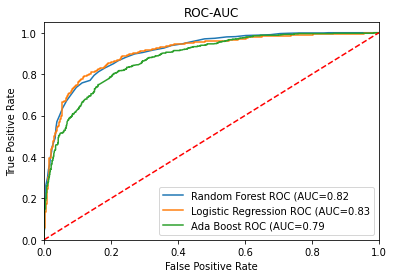

In [59]:
# Definindo os modelos a serem executados pela pipeline
models = ['MoviesRandomForest', 'MoviesLogisticRegression', 'MoviesAdaBoost']

# Rodando a pipeline com os modelos definidos acima
# E salvando os resultados (DataFrame) na variável results_cv
# Utilizando o `debug=True` para ver "movimento" na execução
results_cv = model_test_pipeline(
    models=models,
    X_train=X_train_cv,
    X_test=X_test_cv,
    y_train=y_train,
    y_test=y_test,
    debug=True
)

Realizando o fit do modelo Random Forest
Model      : Random Forest
Accuracy   : 0.8253
Precision  : 0.8254
Recall     : 0.8183
F1 - Score : 0.8253
ROC - AUC  : 0.8253
Realizando o fit do modelo Logistic Regression
Model      : Logistic Regression
Accuracy   : 0.8413
Precision  : 0.8414
Recall     : 0.8439
F1 - Score : 0.8413
ROC - AUC  : 0.8414
Realizando o fit do modelo Ada Boost
Model      : Ada Boost
Accuracy   : 0.7893
Precision  : 0.7911
Recall     : 0.8250
F1 - Score : 0.7891
ROC - AUC  : 0.7897


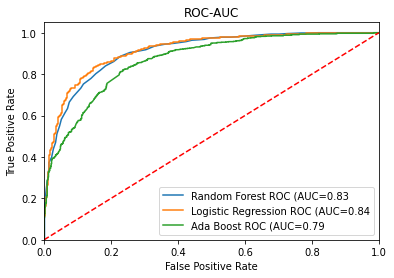

In [60]:
# Instânciando o CountVectorizer com binary=True
cv_binary_true = CountVectorizer(binary=True)
# Realizando a transformação dos nossos documentos em features
X_train_binary_true = cv_binary_true.fit_transform(X_train).toarray()
X_test_binary_true = cv_binary_true.transform(X_test).toarray()

# Definindo os modelos a serem executados pela pipeline
models = ['MoviesRandomForest', 'MoviesLogisticRegression', 'MoviesAdaBoost']

# Rodando a pipeline com os modelos definidos acima
# E salvando os resultados (DataFrame) na variável results_cv
# Utilizando o `debug=True` para ver "movimento" na execução
results_binary_true = model_test_pipeline(
    models=models,
    X_train=X_train_binary_true,
    X_test=X_test_binary_true,
    y_train=y_train,
    y_test=y_test,
    debug=True
)

In [63]:
# Imprimindo os resultados de binary False ou True
print('Resultados binary=False')
display(results_cv)
print('='*36)
print('Resultados binary=True')
display(results_binary_true)

Resultados binary=False


,model,accuracy,precision,recall,f1-score,roc-auc
0,Random Forest,0.824667,0.824797,0.811575,0.824626,0.824546
1,Logistic Regression,0.830000,0.829999,0.826380,0.829996,0.829967
2,Ada Boost,0.790667,0.792693,0.829071,0.790410,0.791022


Resultados binary=True


,model,accuracy,precision,recall,f1-score,roc-auc
0,Random Forest,0.825333,0.825353,0.818304,0.825320,0.825268
1,Logistic Regression,0.841333,0.841367,0.843876,0.841337,0.841357
2,Ada Boost,0.789333,0.791101,0.825034,0.789113,0.789663


In [64]:
# Adicionando uma coluna de informação sobre qual foi a transformação aplicada
results_binary_true['Transformacao'] = 'Binary True'
results_cv['Transformacao'] = 'Binary False'

In [69]:
# Juntando os DataFrames de resultado
resultados_consolidados = pd.concat([results_cv, results_binary_true]).reset_index(drop=True)

In [71]:
# Ordenando os resultados de acordo com a precisão
resultados_consolidados.sort_values('precision', ascending=False)

,model,accuracy,precision,recall,f1-score,roc-auc,Transformacao
4,Logistic Regression,0.841333,0.841367,0.843876,0.841337,0.841357,Binary True
1,Logistic Regression,0.830000,0.829999,0.826380,0.829996,0.829967,Binary False
3,Random Forest,0.825333,0.825353,0.818304,0.825320,0.825268,Binary True
0,Random Forest,0.824667,0.824797,0.811575,0.824626,0.824546,Binary False
2,Ada Boost,0.790667,0.792693,0.829071,0.790410,0.791022,Binary False
5,Ada Boost,0.789333,0.791101,0.825034,0.789113,0.789663,Binary True


## TF-IDF

**Term Frequency and Inverse Document Frequency** é uma tranformação muito conhecida, onde avaliamos a relevância das palavras pelo **Frequência dos Termos** multiplicado pelo **Inverso da Frequência nos Documentos**, onde **documento** é cada um dos textos dentro de um Dataset. Vamos entender cada um dos termos:

> **TF - Term Frequency**: é a frequência de vezes que um termo/palavra aparece em cada um dos documentos analisados (isso nos ajuda a avaliar a relevância daquela palavra);

> **IDF - Inverse Document Frequency**: aqui avaliamos em quantos documentos o termo/palavra aparece (dessa forma conseguimos entender a sua influência em identificar os textos);

O TF acredito que seja bem claro o entendimento, mas o IDF pode ser um pouco confuso, então vamos explicar da seguinte forma:
<br><br>
Imagina que temos diversos textos (documents) sobre esportes e queremos classificar os textos de acordo com os esportes tratados (futebol, basquete e etc). Se uma palavra aparecer em todos os textos qual a relevância dela na identificação do texto? Mínima (Por exemplo a palavra esporte em textos que só falam sobre esporte).
<br><br>
Por outro lado, se a palavra esgrima aparece em apenas um dos documentos (ou poucos deles), ela vai ser importante para a identificação daquele texto!
<br><br>
Resumindo o conceito de TF-IDF em diagrama, temos que:

<img src="https://www.researchgate.net/profile/Haider-Al-Khateeb/publication/291950178/figure/fig1/AS:330186932408324@1455734107458/Term-Frequency-Inverse-Document-Frequency-TF-IDF.png" width=800>

Um exemplo simples:  
Corpus (D):  
(d1) - Hoje choveu muito em São Paulo. Sendo que ontem também choveu...  
(d2) - Hoje choveu pouco no Rio de Janeiro.  

Pergunta: **Qual a relevância da palavra *choveu* para o corpus *D*?**  

TF("choveu", d1) = 2 / 11 = 0.1819  
TF("choveu", d2) = 1 / 7 = 0.1429  

IDF = log(2/2) = 0  -> Apareceu duas vezes (numerador) do total de dois (denominador)  

TF-IDF(d1) = 0.1819 * 0 = 0  
TF-IDF(d2) = 0.1429 * 0 = 0  

Resposta:  
**Utilizando o TF-IDF a palavra choveu é igualmente relevante para ambos os documento**. E traz pouca informação para diferenciar os documentos do corpus (conjunto de mensagens pré-processadas).  

Vamos aplicá-lo na prática:

In [72]:
# Importando o extrator de features de texto
# TF-IDF do scikit learn
from sklearn.feature_extraction.text import TfidfVectorizer

# Instanciando o TF-IDF
tfidf = TfidfVectorizer(
    # N-gram range(min e max), indica se queremos contar n-gramas
    # (1,1) significa apenas unigramas
    ngram_range=(1,1),
    # Utilizando o IDF
    use_idf=True
)

In [73]:
# Extraindo o vocabulário e contando a frequência por frase
# e aplicando o IDF
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [75]:
# Temos uma matriz esparsa
# Forma eficiente de armazenar dados com muitos zeros!
X_train_tfidf

<3500x22126 sparse matrix of type '<class 'numpy.float64'>'
	with 328057 stored elements in Compressed Sparse Row format>

In [76]:
# Extraindo o vocabulário e contando a frequência por frase
# e aplicando o IDF
# Aplicamos o `todense` para transformar a matriz esparsa em uma matriz densa
X_train_tfidf = tfidf.fit_transform(X_train).todense()
X_test_tfidf = tfidf.transform(X_test).todense()

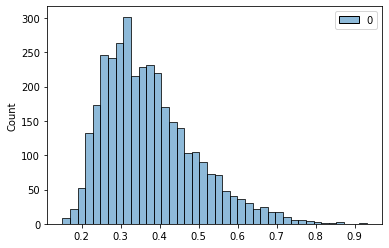

In [78]:
# Visualizar a frequência máxima por documento
sns.histplot(X_train_tfidf.max(axis=1))
plt.show()

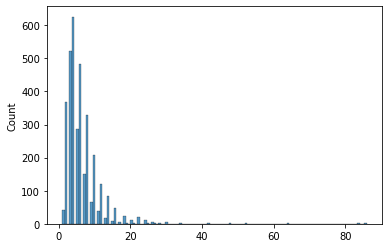

In [79]:
# comparando com o CountVectorizer
sns.histplot(X_train_cv.max(axis=1))

Realizando o fit do modelo Random Forest


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Model      : Random Forest
Accuracy   : 0.8287
Precision  : 0.8287
Recall     : 0.8237
F1 - Score : 0.8287
ROC - AUC  : 0.8286
Realizando o fit do modelo Logistic Regression


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn

Model      : Logistic Regression
Accuracy   : 0.8587
Precision  : 0.8589
Recall     : 0.8694
F1 - Score : 0.8587
ROC - AUC  : 0.8588
Realizando o fit do modelo Ada Boost


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Model      : Ada Boost
Accuracy   : 0.7887
Precision  : 0.7912
Recall     : 0.8318
F1 - Score : 0.7883
ROC - AUC  : 0.7891


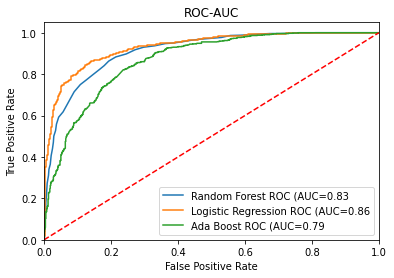

In [81]:
# Definindo os modelos a serem executados pela pipeline
models = ['MoviesRandomForest', 'MoviesLogisticRegression', 'MoviesAdaBoost']

# Rodando a pipeline com os modelos definidos acima
# E salvando os resultados (DataFrame) na variável results_cv
# Utilizando o `debug=True` para ver "movimento" na execução
# Utilizando os dados transformados pelo TF-IDF
results_tfidf = model_test_pipeline(
    models=models,
    X_train=X_train_tfidf,
    X_test=X_test_tfidf,
    y_train=y_train,
    y_test=y_test,
    debug=True
)

In [83]:
# Imprimindo os resultados de binary False ou True
print('Resultados binary=False')
display(results_cv)
print('='*36)
# Visualizando os resultados do TF-IDF
print('Resultados TF-IDF')
display(results_tfidf)

Resultados binary=False


,model,accuracy,precision,recall,f1-score,roc-auc,Transformacao
0,Random Forest,0.824667,0.824797,0.811575,0.824626,0.824546,Binary False
1,Logistic Regression,0.830000,0.829999,0.826380,0.829996,0.829967,Binary False
2,Ada Boost,0.790667,0.792693,0.829071,0.790410,0.791022,Binary False


Resultados TF-IDF


,model,accuracy,precision,recall,f1-score,roc-auc
0,Random Forest,0.828667,0.828671,0.823688,0.828659,0.828621
1,Logistic Regression,0.858667,0.858905,0.869448,0.858662,0.858766
2,Ada Boost,0.788667,0.791163,0.831763,0.788333,0.789065


## Exercícios
**1)** Utilizando os dados de tweets vamos avaliar com modelos de Machine Learning se os tweets são de desastres ou não. Essa base é um dataset conhecido do Kaggle, onde vocês podem ter mais detalhes [clicando aqui](https://www.kaggle.com/c/nlp-getting-started/overview).